In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  
import Simulator as sim

import keras
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dropout
from keras.layers.core import Dense
from keras.optimizers import Adam

from random import randint


Using TensorFlow backend.


In [2]:
### Creating dataset from data points ###

c = 4   # Damping constant
k = 2   # Stiffness of the spring
m = 20  # Mass
F = 5   # Force


vals = sim.generate(c,k,m,F) ## Generating the training data with separate module #
vals2 = sim.generate(c,k,m,F, x0=0.2) ## Generating the secound set of data       #


### Under here simulation results are sifted as the simulations are added together ###
list_t = list(zip(np.concatenate((np.delete(vals[1],len(vals[1])-1), np.delete(vals2[1],len(vals2[1])-1)), axis=0), np.concatenate((np.delete(vals[2],0),np.delete(vals2[2],0)), axis=0)))

dframe = pd.DataFrame(list_t, columns=["Speed", 'Position']) ##Creating Pandas DF from data ##

print (dframe)
### Suffle and split data to val and train data ###
dframe_train, validate = \
              np.split(dframe.sample(frac=1, random_state=42), 
                       [int(.9*len(dframe))])


Y = dframe_train["Position"]
X = dframe_train


print (Y)
print (X)


x_val = validate 
y_val = x_val["Position"] ## Select matching val data for y_val ##


[array([ 0.        ,  0.06006006,  0.12012012,  0.18018018,  0.24024024,
        0.3003003 ,  0.36036036,  0.42042042,  0.48048048,  0.54054054,
        0.6006006 ,  0.66066066,  0.72072072,  0.78078078,  0.84084084,
        0.9009009 ,  0.96096096,  1.02102102,  1.08108108,  1.14114114,
        1.2012012 ,  1.26126126,  1.32132132,  1.38138138,  1.44144144,
        1.5015015 ,  1.56156156,  1.62162162,  1.68168168,  1.74174174,
        1.8018018 ,  1.86186186,  1.92192192,  1.98198198,  2.04204204,
        2.1021021 ,  2.16216216,  2.22222222,  2.28228228,  2.34234234,
        2.4024024 ,  2.46246246,  2.52252252,  2.58258258,  2.64264264,
        2.7027027 ,  2.76276276,  2.82282282,  2.88288288,  2.94294294,
        3.003003  ,  3.06306306,  3.12312312,  3.18318318,  3.24324324,
        3.3033033 ,  3.36336336,  3.42342342,  3.48348348,  3.54354354,
        3.6036036 ,  3.66366366,  3.72372372,  3.78378378,  3.84384384,
        3.9039039 ,  3.96396396,  4.02402402,  4.08408408,  4.1

In [3]:
### CUSTOM LOSS FUNCTION ###

### using keras as backed for loss function ###

def custom_loss(y_true, y_pred):
    
    loss = K.square(y_pred - y_true) 
    loss = loss * 0.4
    
    
    return loss

In [4]:
### CREATING NN MODEL ###

model=Sequential([Dense(2,input_shape=(2,), activation="softplus"),
                  Dense(4,activation="softplus"),
                  Dense(4,activation="softplus"),
                  Dense(1)])

model.compile(Adam(lr=0.001),loss=custom_loss)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [5]:
###TRAINING OF MODEL ###

history = model.fit(X, Y, epochs=150, validation_data=(x_val, y_val))

##callbacks= [keras.callbacks.EarlyStopping(patience=5)],


Train on 1798 samples, validate on 200 samples
Epoch 1/150
1798/1798 [==============================] - 0s 278us/step - loss: 0.0853 - val_loss: 0.0957
Epoch 2/150
1798/1798 [==============================] - 0s 104us/step - loss: 0.0701 - val_loss: 0.0854
Epoch 3/150
1798/1798 [==============================] - 0s 148us/step - loss: 0.0610 - val_loss: 0.0723
Epoch 4/150
1798/1798 [==============================] - 0s 153us/step - loss: 0.0512 - val_loss: 0.0602
Epoch 5/150
1798/1798 [==============================] - 0s 158us/step - loss: 0.0411 - val_loss: 0.0477
Epoch 6/150
1798/1798 [==============================] - 0s 154us/step - loss: 0.0321 - val_loss: 0.0370
Epoch 7/150
1798/1798 [==============================] - 0s 150us/step - loss: 0.0243 - val_loss: 0.0275
Epoch 8/150
1798/1798 [==============================] - 0s 152us/step - loss: 0.0178 - val_loss: 0.0202
Epoch 9/150
1798/1798 [==============================] - 0s 154us/step - loss: 0.0129 - val_loss: 0.0145
Epoch 1

1798/1798 [==============================] - 0s 153us/step - loss: 3.2575e-05 - val_loss: 3.2851e-05
Epoch 74/150
1798/1798 [==============================] - 0s 149us/step - loss: 2.9597e-05 - val_loss: 2.7135e-05
Epoch 75/150
1798/1798 [==============================] - 0s 146us/step - loss: 2.7320e-05 - val_loss: 2.4684e-05
Epoch 76/150
1798/1798 [==============================] - 0s 149us/step - loss: 2.6789e-05 - val_loss: 2.3500e-05
Epoch 77/150
1798/1798 [==============================] - 0s 155us/step - loss: 2.3629e-05 - val_loss: 2.2241e-05
Epoch 78/150
1798/1798 [==============================] - 0s 149us/step - loss: 2.2556e-05 - val_loss: 2.1929e-05
Epoch 79/150
1798/1798 [==============================] - 0s 153us/step - loss: 2.2007e-05 - val_loss: 2.0197e-05
Epoch 80/150
1798/1798 [==============================] - 0s 151us/step - loss: 2.1762e-05 - val_loss: 1.9234e-05
Epoch 81/150
1798/1798 [==============================] - 0s 150us/step - loss: 1.9210e-05 - val_loss

1798/1798 [==============================] - 0s 155us/step - loss: 3.4111e-06 - val_loss: 4.6245e-06
Epoch 145/150
1798/1798 [==============================] - 0s 149us/step - loss: 3.3338e-06 - val_loss: 2.9054e-06
Epoch 146/150
1798/1798 [==============================] - 0s 153us/step - loss: 3.1982e-06 - val_loss: 2.9360e-06
Epoch 147/150
1798/1798 [==============================] - 0s 157us/step - loss: 2.8595e-06 - val_loss: 4.8154e-06
Epoch 148/150
1798/1798 [==============================] - 0s 165us/step - loss: 3.5215e-06 - val_loss: 2.8974e-06
Epoch 149/150
1798/1798 [==============================] - 0s 173us/step - loss: 3.3030e-06 - val_loss: 2.3987e-06
Epoch 150/150
1798/1798 [==============================] - 0s 164us/step - loss: 2.7420e-06 - val_loss: 2.5220e-06


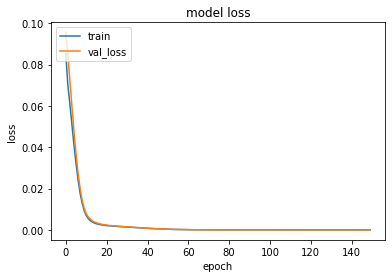

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val_loss'], loc='upper left')
plt.show()

In [7]:
### Creating testing data ###

#c = 5 # Damping constant
#k = 6 # Stiffness of the spring
#m = 40 # Mass
F2 = randint(1,10)  #Different force for testing


testvals = sim.generate(c,k,m,F2,x0=0.1) ## Generating testing data##


list_t2 = list(zip( testvals[1], testvals[2]))
dframe2 = pd.DataFrame(list_t2, columns=["Speed", 'Position'])
timeframe = pd.DataFrame(testvals[0], columns=["Time"]) ## For plotting resutlts


print (dframe2)

Y2 = dframe2["Position"].iloc[1:]
X2 = dframe2.head(-1)


        Speed  Position
0    0.000000  0.100000
1    0.023282  0.100701
2    0.046277  0.102791
3    0.068982  0.106254
4    0.091390  0.111071
..        ...       ...
995 -0.002617  3.996717
996 -0.002566  3.996562
997 -0.002514  3.996409
998 -0.002462  3.996260
999 -0.002410  3.996113

[1000 rows x 2 columns]


1798/1798 [==============================] - 0s 22us/step
2.211963728006202e-06


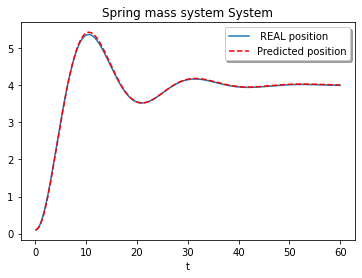

In [8]:
#### Test ####

results = model.evaluate(X, Y, batch_size=128)
print(results)

y_pred = [] ## List for predictions

for row in X2.itertuples(): ## Iterates trough test set getting predictions
    xr = model.predict(np.array([[row.Speed, row.Position]])) 
    y_pred.append(float(xr[0]))

 

plt.plot(timeframe.iloc[1:], Y2)
plt.plot(timeframe.iloc[1:], y_pred, linestyle='dashed', color='red')

plt.xlabel('t')
plt.legend([' REAL position',  'Predicted position'], shadow=True)
plt.title('Spring mass system System')
plt.show()